In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 

from matplotlib.cm import hot  as colormap 
from matplotlib.cm import ScalarMappable 
from matplotlib.colorbar import ColorbarBase as cbar
from matplotlib.colors import Normalize as cnorm

from testsuite.utilities import Pareto_split

In [2]:
def gen_points(n_dim, n):
    points = np.abs(np.random.multivariate_normal(np.zeros(n_dim), np.diag(np.ones(n_dim)), n))
    return points
    
def gen_nondominated(n_dim, n):
    points = np.abs(np.random.multivariate_normal(np.zeros(n_dim), np.diag(np.ones(n_dim)), n))
    norms =  np.linalg.norm(points, axis=1)
    return (points.T/norms).T

def gen_random_nondominated(n_dim, n):
    points = gen_nondominated(n_dim, n)
    points  = (points.T*np.random.randn(len(points))/10).T
    points = points-points.min(axis=0)
    return Pareto_split(points)[0]

# 2D

- scatter non-dominated points in 2d
- define dm preference vector
- find all pairs
- find the vectors of each ray from origin to the points
- find mid-point
- check sign(cross(ray, midpoint)) == (cross(ray, dm_vector)) for all rays in each pair

8 points generated


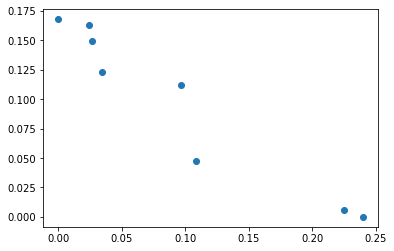

In [3]:
np.random.seed(2)
n_dim = 2
n_points = 1000
points_2d = gen_random_nondominated(n_dim, n_points) 
print('{} points generated'.format(len(points_2d)))

fig00 = plt.figure()
fig00_ax = fig00.gca()
fig00_ax.scatter(*points_2d.T)

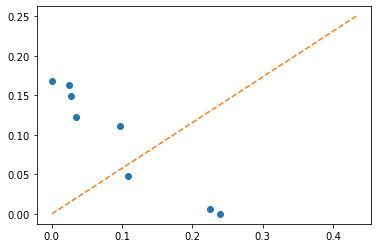

In [4]:
## dm preferences
dmv_angle = (30/360)*np.pi*2
dm_origin = [0, 0]
dmv = np.array([dm_origin, [np.cos(dmv_angle), np.sin(dmv_angle)]])/2
fig00_ax.plot(*dmv.T, c="C1", linestyle="--")
fig00

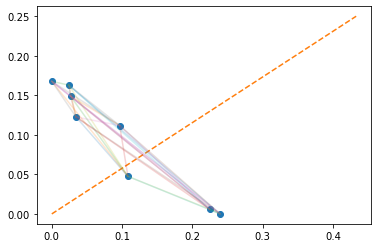

In [5]:
## all point pairs
pairs = np.array(list(combinations(points_2d, n_dim)))
fig00_ax.plot(*pairs.T, alpha=0.2)
fig00

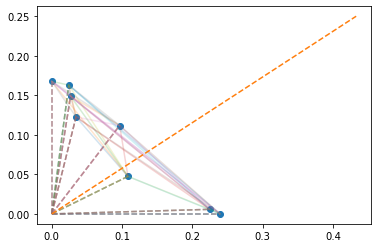

In [6]:
fig01 = plt.figure()
fig01_ax = fig01.gca()
fig01_ax.scatter(*points_2d.T)

for i, pair in enumerate(pairs):
    p1 = np.vstack((np.zeros_like(pair[0]), pair[0]))
    p2 = np.vstack((np.zeros_like(pair[1]), pair[1]))
    fig01_ax.plot(*p1.T, c="C{}".format(i), alpha=0.2, linestyle="--")
    fig01_ax.plot(*p2.T, c="C{}".format(i), alpha=0.2, linestyle="--")
    fig01_ax.plot(*pair.T, c="C{}".format(i), alpha=0.2)
    

fig01_ax.plot(*dmv.T, c="C1", linestyle="--")

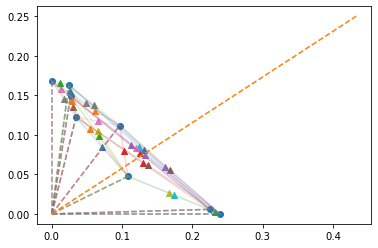

In [7]:
for i, pair in enumerate(pairs):
    fig01_ax.scatter(*pair.mean(axis=0).T, c="C{}".format(i), marker="^")
fig01

In [8]:
def compare_angles(dmv, midpoint, point):
    bbool =  (np.cross(point, midpoint)< 0.) == (np.cross(point, dmv)< 0.)
    return bbool

intersecting_pairs = np.zeros(pairs.shape[0], dtype=bool)
for i, pair in enumerate(pairs):
    midpoint = pair.mean(axis=0)
    p1_bool = compare_angles(dmv[1], midpoint, pair[0])
    p2_bool = compare_angles(dmv[1], midpoint, pair[1])
    intersecting_pairs[i] = p1_bool and p2_bool 
intersecting_pairs

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False])

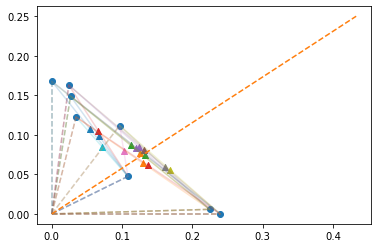

In [9]:
fig02 = plt.figure()
fig02_ax = fig02.gca()
fig02_ax.scatter(*points_2d.T)

for i, pair in enumerate(pairs[intersecting_pairs]):
    p1 = np.vstack((np.zeros_like(pair[0]), pair[0]))
    p2 = np.vstack((np.zeros_like(pair[1]), pair[1]))
    fig02_ax.plot(*p1.T, c="C{}".format(i), alpha=0.2, linestyle="--")
    fig02_ax.plot(*p2.T, c="C{}".format(i), alpha=0.2, linestyle="--")
    fig02_ax.plot(*pair.T, c="C{}".format(i), alpha=0.2)
    fig02_ax.scatter(*pair.mean(axis=0).T, c="C{}".format(i), marker="^")
    
fig02_ax.plot(*dmv.T, c="C1", linestyle="--")


In [10]:
print("all pairs: ", pairs.shape[0])
print("intersecting pairs: ", pairs[intersecting_pairs].shape[0])

all pairs:  28
intersecting pairs:  15


In [11]:
def get_smallest_vector(pairs):
    return np.linalg.norm(pairs[:, 0]- pairs[:, 1], axis=1).argmin()

In [12]:
f_ind = get_smallest_vector(pairs[intersecting_pairs])
f_ind

6

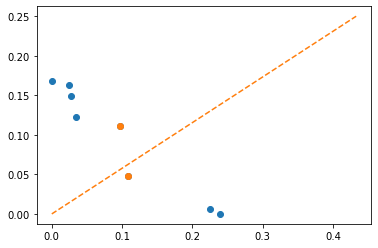

In [13]:
fig03 = plt.figure()
fig03_ax = fig03.gca()
fig03_ax.scatter(*points_2d.T)

fig03_ax.plot(*dmv.T, c="C1", linestyle="--")
fig03_ax.scatter(*pairs[intersecting_pairs][f_ind].T, c="C1")


# 3D

- scatter non-dominated points in 2d
- define dm preference vector
- find all three-point combinations 
- find the vectors of each point from origin to the points (trivial)
- find the equations for each of the 3 extruded surfaces
- find mid-point
- find the angle from the surfaces to the dm vector
- find the angle from the surfaces to the midpoint vector 

In [14]:
%matplotlib qt

In [17]:
# dm vector
dmv_lmn = np.array([1,2,1.5])
dmv_c = np.array([0,0,0.])

def dm_vector_3d(t):
    return x*dmv_lmn+dmv_c

In [157]:
np.random.seed(2)
n_dim = 3
n_points = 1000
points_3d = gen_random_nondominated(n_dim, n_points) 
print('{} points generated'.format(len(points_2d)))


fig10 = plt.figure(figsize=[8,8])
fig10_ax = fig10.gca(projection="3d")
fig10_ax.scatter(*points_3d.T)

lim_x = fig10_ax.get_xlim()[1]
dmv3 = np.vstack((np.zeros(3), dm_vector_3d(lim_x)))
fig10_ax.plot(*dmv3.T, c="C1", linestyle="--")

8 points generated


In [19]:
pairs = np.array(list(combinations(points_3d, n_dim)))

In [156]:
fig11 = plt.figure(figsize=[8,8])
fig11_ax = fig11.gca(projection="3d")
fig11_ax.scatter(*points_3d.T)

for pair in pairs:
    pp = np.vstack((pair, pair[0]))
    fig11_ax.plot(*pp.T, c="C0", alpha=0.1)

In [21]:
fig12 = plt.figure(figsize=[8,8])
fig12_ax = fig12.gca(projection="3d")
fig12_ax.scatter(*points_3d.T)

for i, pair in enumerate(pairs):
    for p in pair:
        fig12_ax.plot(*np.vstack((np.zeros(3), p)).T, c="C{}".format(i), alpha=0.1)

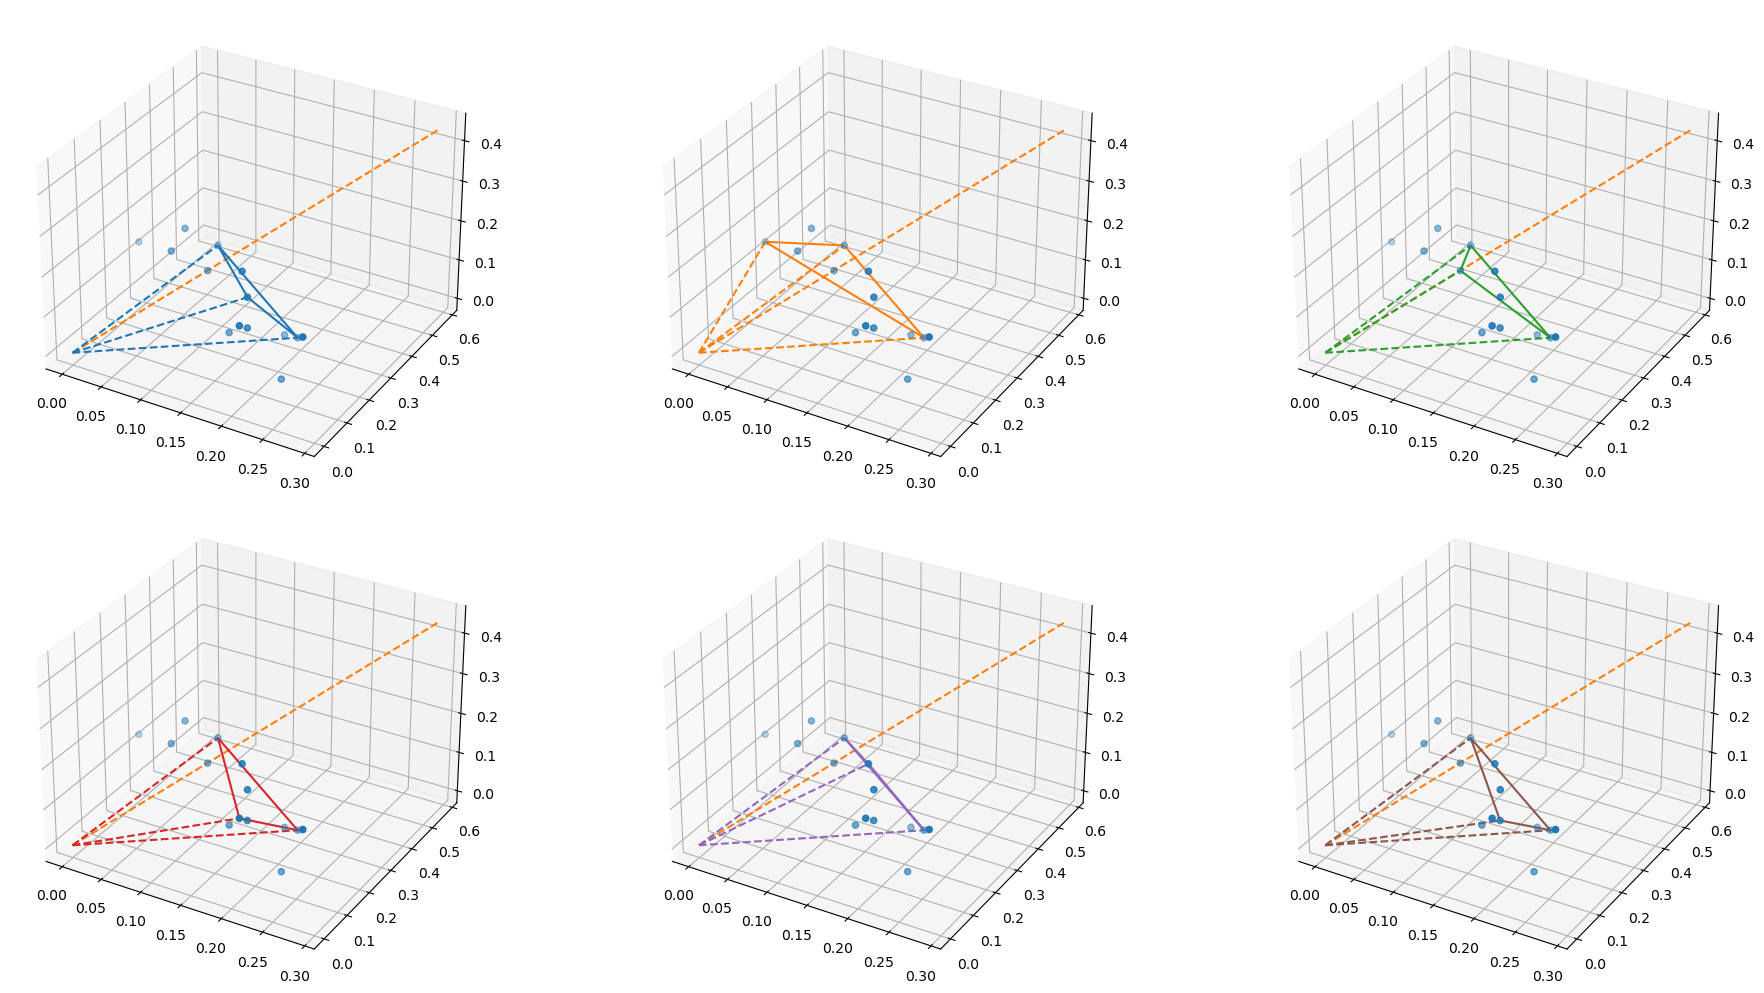

In [169]:
fig13, fig13_axes = plt.subplots(2,3, figsize=[20, 10], subplot_kw=dict(projection='3d'))
fig13.tight_layout()

for i, ax in enumerate(fig13.axes):
    ax.scatter(*points_3d.T)
    ax.plot(*dmv3.T, c="C1", linestyle="--")
    
    pair = pairs[i]
    ax.plot(*np.vstack((pair, pair[0])).T, c="C{}".format(i), alpha=1)
    for p in pair:
        ax.plot(*np.vstack((np.zeros_like(p), p)).T, c="C{}".format(i), alpha=1, linestyle="--")
    
     
fig13

In [54]:
intersection_indices = np.zeros(len(pairs), dtype=bool)
for i, pair in enumerate(pairs):
    mid = pair.mean(axis=0)
    pair_combinations = list(combinations(pair, 2))
    vqs = np.zeros(len(pair_combinations), dtype=bool)
    for j, p in enumerate(pair_combinations):
        p1, p2 = p
        ABC = np.cross(p1, p2)
        ABC = ABC/np.linalg.norm(ABC) # normal vector to the plane
        lmn = dmv_lmn
        ans1 = np.arccos(np.abs(np.sum(ABC*lmn)))/(np.linalg.norm(ABC)*(np.linalg.norm(lmn)))
        
        lmn = mid
        ans2 = np.arccos(np.abs(np.sum(ABC*lmn)))/(np.linalg.norm(ABC)*(np.linalg.norm(lmn)))
        vqs[j] = (ans1>0.) == (ans2>0.)
    if np.all(vqs):
        intersection_indices[i] = True

<ipython-input-54-a66da3ffb8f0>:11: RuntimeWarning: invalid value encountered in arccos
  ans1 = np.arccos(np.abs(np.sum(ABC*lmn)))/(np.linalg.norm(ABC)*(np.linalg.norm(lmn)))


In [55]:
intersection_indices

array([False,  True,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
       False,  True,

In [130]:
pair = pairs[0]
pair
midpoint = pair.mean(axis=0)

pair_combinations = list(combinations(pair, 2))
pair_comb_test = np.array([*pair_combinations[0]])

pair_vectors = (pair_comb_test.T/np.linalg.norm(pair_comb_test, axis=1)).T

mid_surf = np.mean(np.vstack((np.zeros(3), pair_comb_test)), axis=0)
normal = np.cross(pair_comb_test[0], pair_comb_test[1])

In [131]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection="3d")


ax.scatter(*pair.T, c="C0", s=20)
ax.plot(*dmv3.T, c="C1")

ax.plot(*np.vstack((pair_comb_test, np.zeros_like(pair_comb_test[0]), pair_comb_test[0])).T, c="C0", linestyle="--")
# ax.scatter(*midpoint.T, c="C0", marker = "x")
ax.plot(*np.vstack((np.zeros(3), normal)).T)

In [133]:
pair_comb_test[0]

array([0.21030116, 0.24795789, 0.03573069])

In [159]:
u = np.vstack((np.zeros(3), pair_comb_test[0]))
v = np.vstack((np.zeros(3), pair_comb_test[1]))
w = np.cross(u, v)

In [168]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(*u.T, c="C0")
ax.plot(*v.T, c="C1")
ax.plot(*w.T, c="C3")

In [167]:
u[1]@w[1]

8.673617379884035e-19